In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

data = pd.read_csv('boston.csv')

def normal(x:list):
    maxi = max(x)
    mini = min(x)
    avg = np.mean(x)
    new = [(i - avg)/(maxi - mini) for i in x]
    
    return new

df = data.copy()
df = df.apply(normal, axis=0)

Xd = df.drop(columns=['medv'])
Xd.insert(0, 'X0', 1) # bias 

# numpy array format
y = df.medv.values
y = np.expand_dims(y, axis=1)
X = Xd.values

# sample size
m = len(df.index)
n = X.shape[1]
theta = np.random.randn(n, 1)

In [2]:
def stochastic_gradient_descent(X, y, theta, epochs=50, learning_rate = 0.01):
    losses = []
    
    for epoch in range(epochs):
        for i in range(m):
            random_index = np.random.randint(m)
            xi = X[random_index:random_index+1]
            yi = y[random_index:random_index+1]
            
            oi = np.dot(xi, theta)
            
            li = 1/2 * (oi - yi)**2
            
            g_li = (oi - yi)
            
            # gradient
            gradient = np.dot(xi.T, g_li)
            
            # update theta
            theta = theta - learning_rate*gradient
            
            losses.append(np.sum(li))
    return theta, losses

In [3]:
theta, losses = stochastic_gradient_descent(X, y, theta)

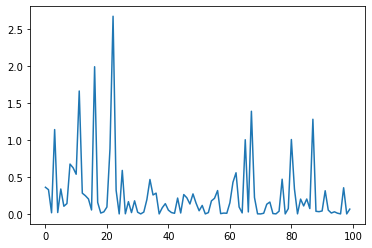

In [5]:
plt.plot(losses[:100])